# Imports

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder 

# Load the data

In [32]:
df = pd.read_csv('data 2.csv')  

df


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
0      Supermarket Type1        3735.138000  
1      Supermarket Type2         443.422800  
2      Supermarket Type1        2097.270000  
3          Grocery Store         732.380000  
4      Supermarket Type1         994.705200  
...                  ...                ...  
14199  Supermarket Type1        2213.476465  
14200  Supermarket Type2        2349.547110  
14201  Supermarket Type1        1892.981544  
14202  Supermarket Type1        4533.564958  
14203  Supermarket Type1        1302.235520  

[14204 rows x 12 columns]

In [33]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

# Check data types

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Describe Numerical Columns


In [35]:
df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         2099.333529  
std          1542.432736  
min            33.290000  
25%           878.856000  
50%          1828.273366  
75%          2949.298043  
max         13086.964800

# Describe Categorical Columns


In [36]:
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"nuber of uniques of {col}: {df[col].nunique()}")
    print(f"uniques:\n{df[col].unique()}")
    print()
    print("*" * 50)
    print() 

nuber of uniques of Item_Identifier: 1559
uniques:
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

**************************************************

nuber of uniques of Item_Fat_Content: 5
uniques:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

**************************************************

nuber of uniques of Item_Type: 16
uniques:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

**************************************************

nuber of uniques of Outlet_Identifier: 10
uniques:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

**************************************************

nuber of uniques of Outlet_Size: 3
uniques:
['Medium' nan 'High' 'Small']

**************************************************

nuber of uniques of Outlet_Location_Type: 3
uniques:
['Tier 1' 

In [37]:
fat_content_mapping = {
    'Low Fat': 'Low Fat',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_mapping)

In [38]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# EDA 

## Univariate Analysis

#### Numerical columns 

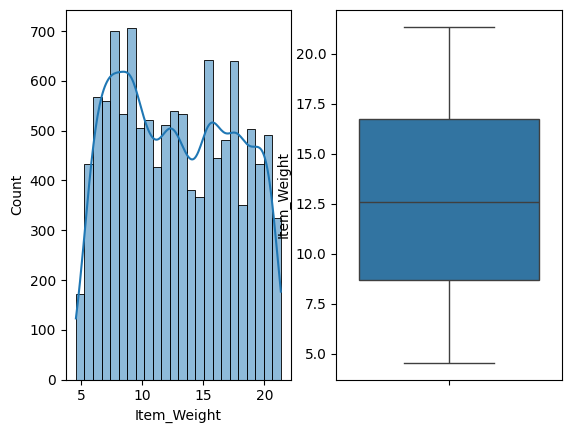

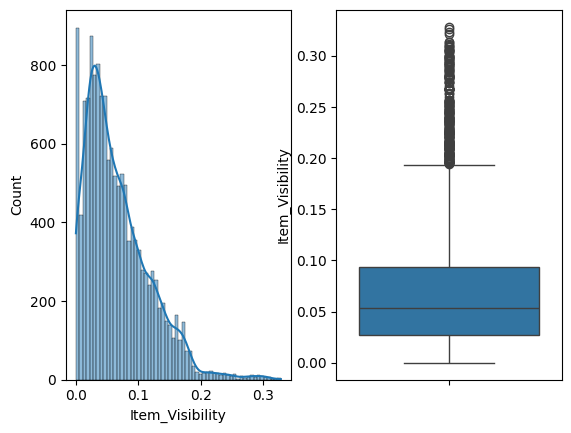

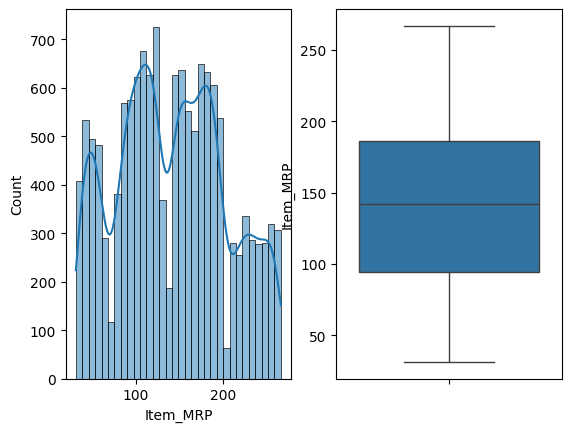

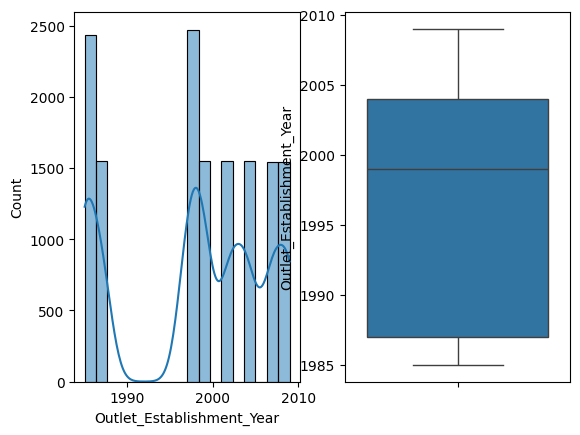

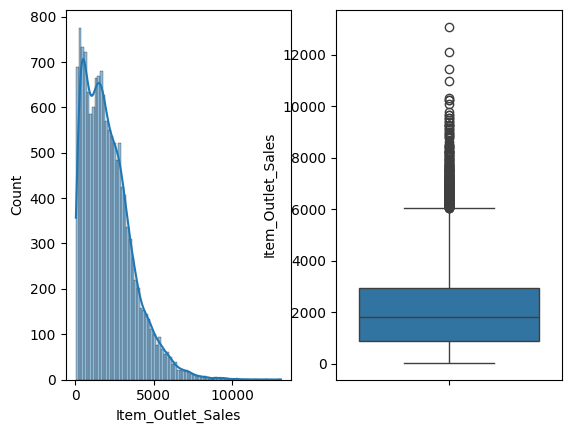

In [39]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[col])
    plt.show()

#### Categorical columns

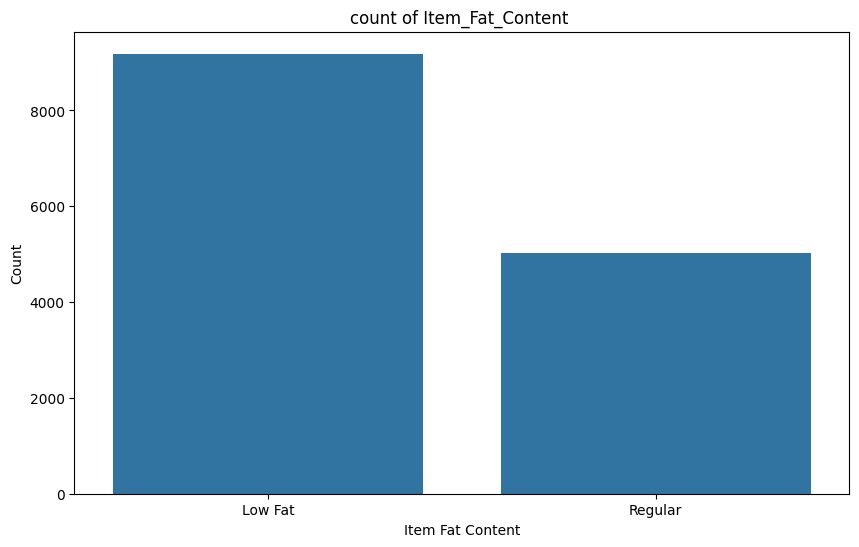

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.title('count of Item_Fat_Content ')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64


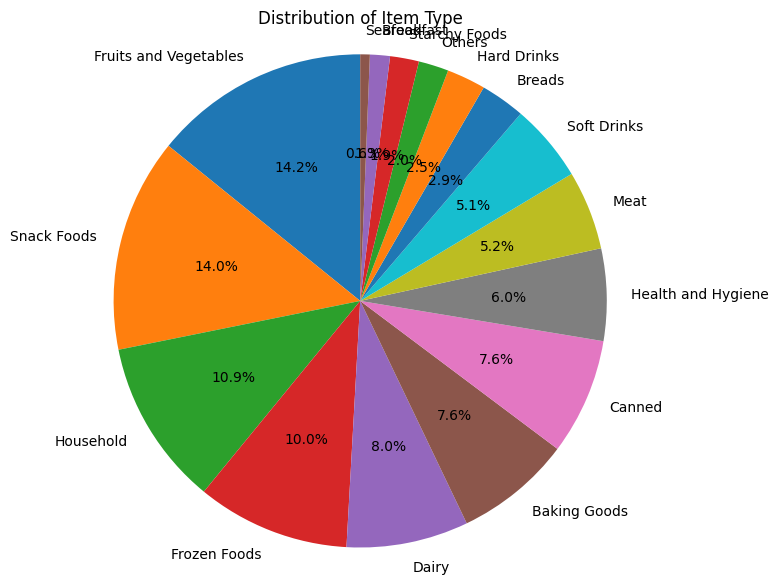

In [41]:
item_type_counts = df['Item_Type'].value_counts()
print(item_type_counts)
plt.figure(figsize=(7, 7))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Item Type')
plt.show()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64


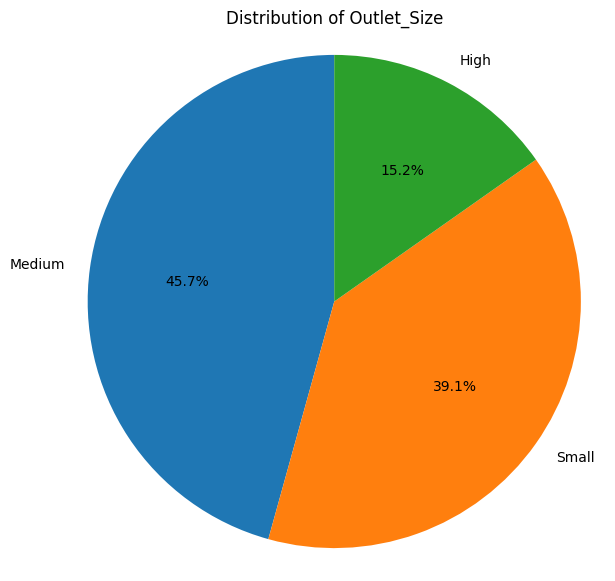

In [42]:
item_type_counts = df['Outlet_Size'].value_counts()
print(item_type_counts)
plt.figure(figsize=(7, 7))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Outlet_Size')
plt.show()

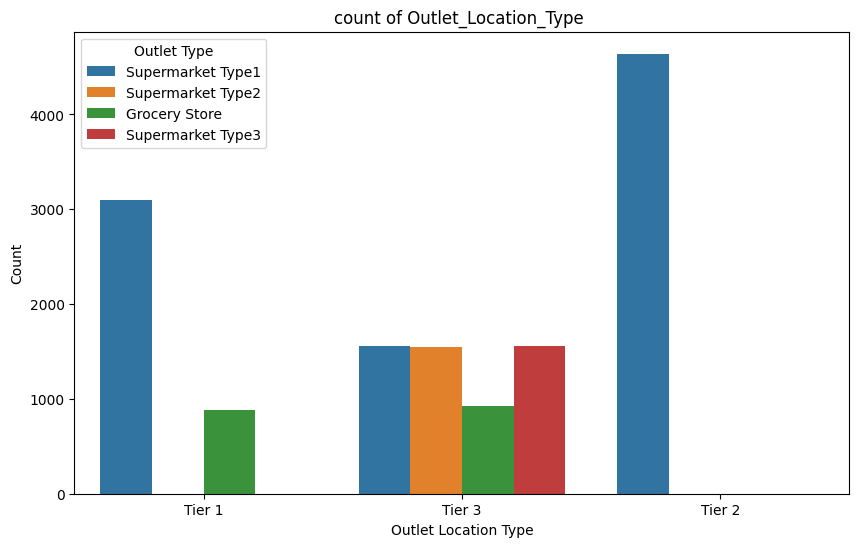

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Location_Type', data=df,hue='Outlet_Type')
plt.title('count of Outlet_Location_Type ')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.legend(title='Outlet Type')
plt.show()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64


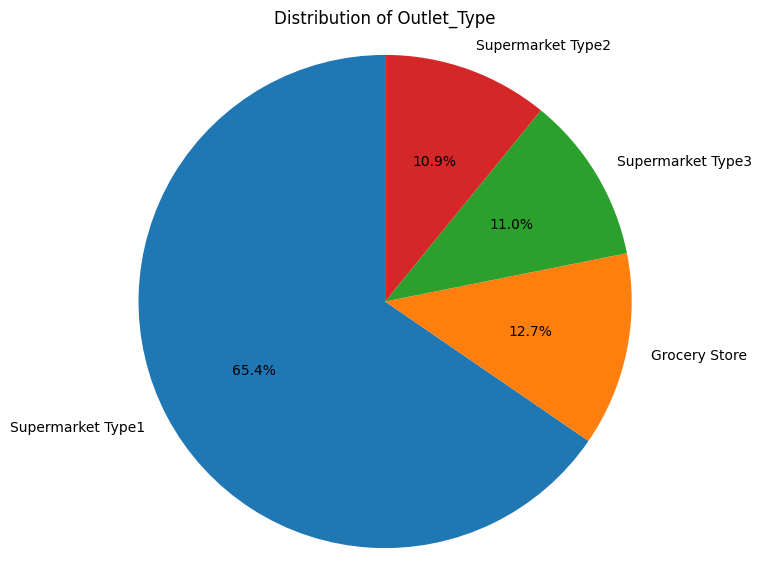

In [44]:
item_type_counts = df['Outlet_Type'].value_counts()
print(item_type_counts)
plt.figure(figsize=(7,7))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Outlet_Type')
plt.show()

## Bi variate analysis

#### Num vs Num

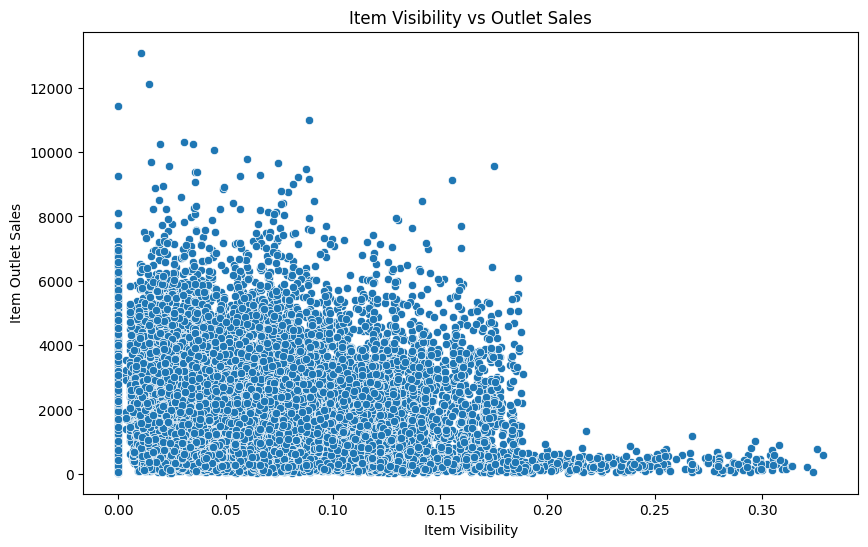

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df)
plt.title('Item Visibility vs Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

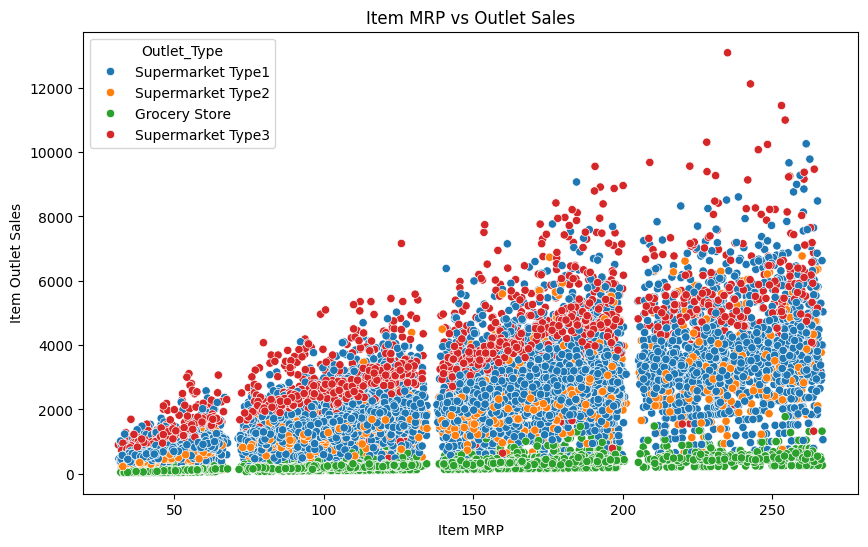

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df,hue='Outlet_Type')
plt.title('Item MRP vs Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

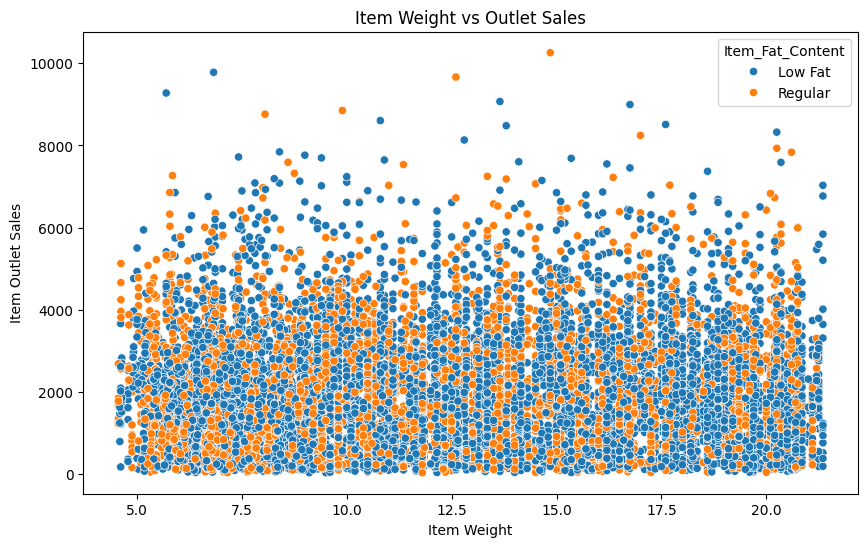

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df,hue='Item_Fat_Content')
plt.title('Item Weight vs Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

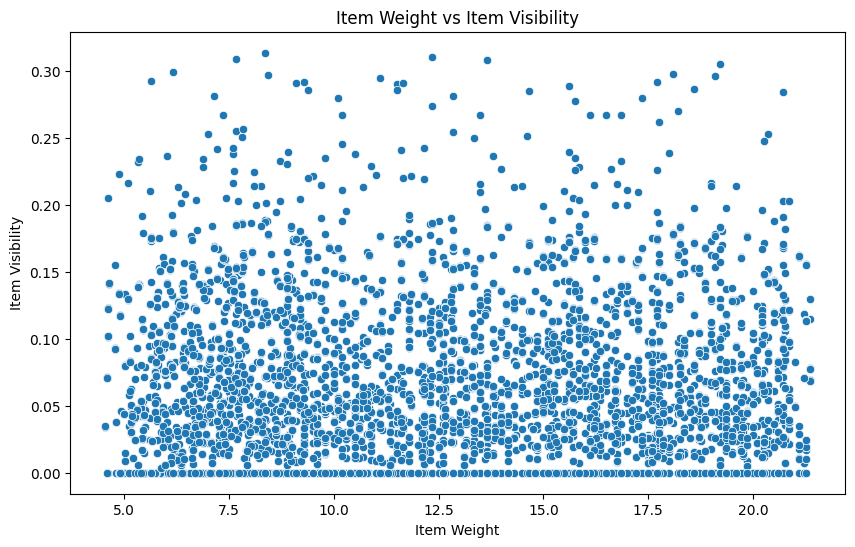

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Visibility', data=df)
plt.title('Item Weight vs Item Visibility')
plt.xlabel('Item Weight')
plt.ylabel('Item Visibility')
plt.show()

#### Num vs Cat

/var/folders/5c/1yvn74ns7yq9hl5048h7kgzc0000gn/T/ipykernel_8864/453050916.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, hue='Outlet_Location_Type', palette='Set2', ci=None)


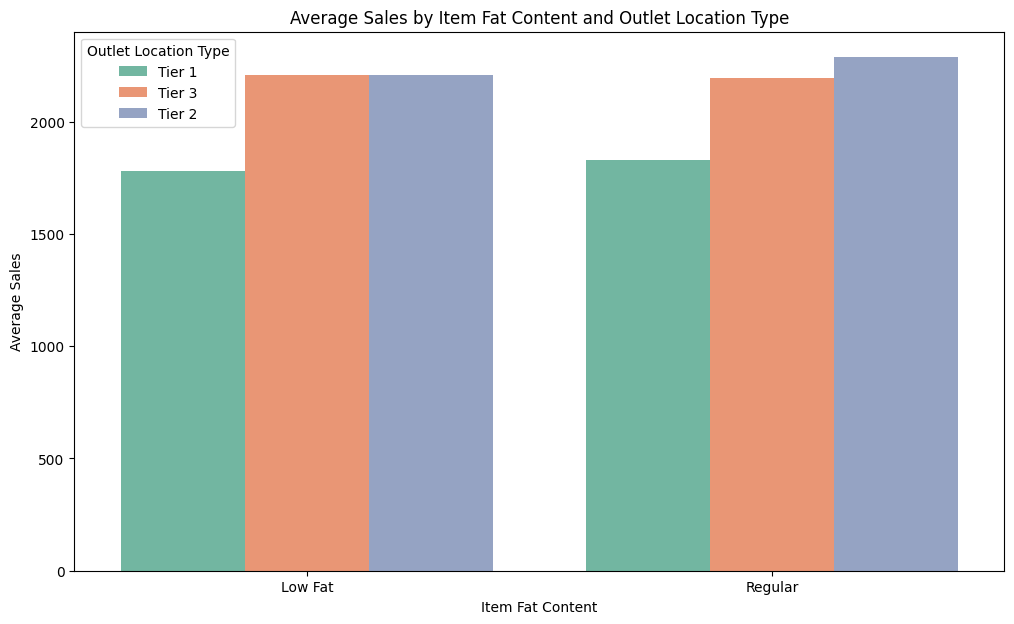

In [49]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, hue='Outlet_Location_Type', palette='Set2', ci=None)
plt.title('Average Sales by Item Fat Content and Outlet Location Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Average Sales')
plt.legend(title='Outlet Location Type')
plt.show()


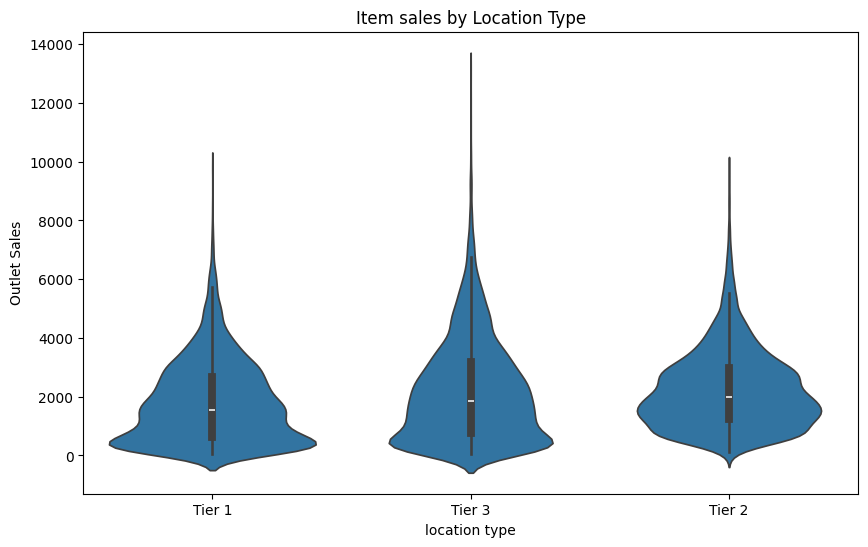

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Item sales by Location Type')
plt.xlabel('location type')
plt.ylabel('Outlet Sales')
plt.show()

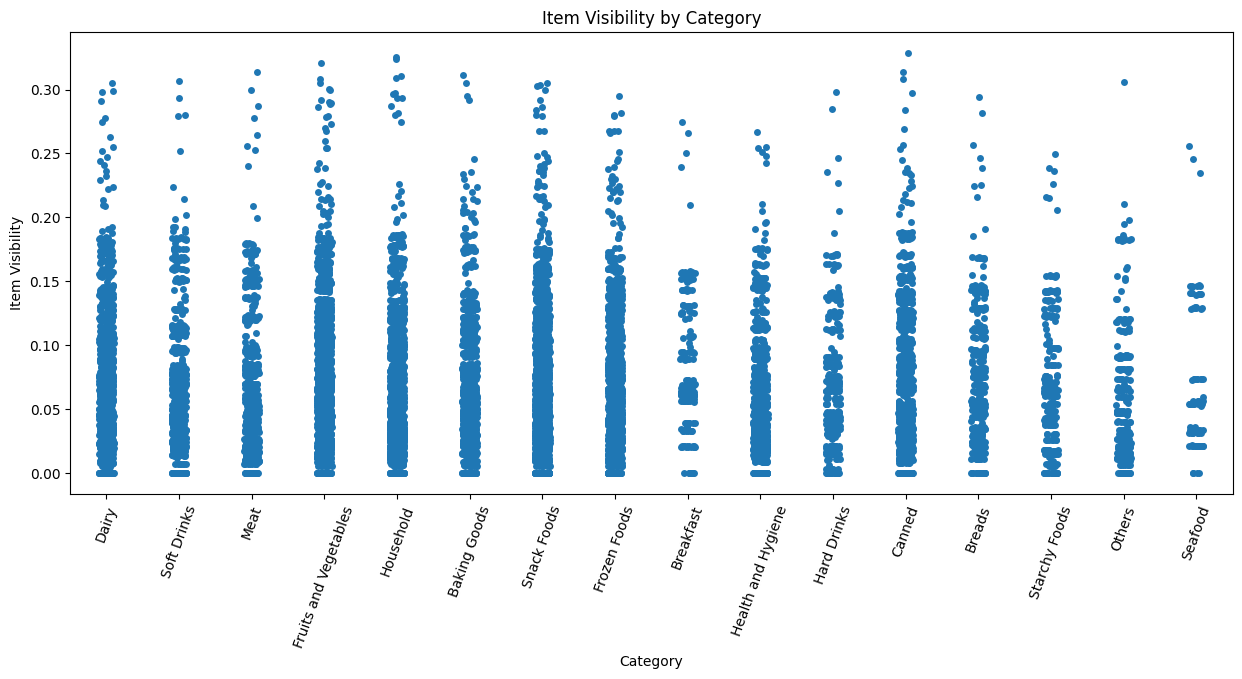

In [51]:
plt.figure(figsize=(15, 6))
sns.stripplot(y='Item_Visibility',
               x='Item_Type', data=df)
plt.title('Item Visibility by Category')
plt.xlabel('Category')
plt.ylabel('Item Visibility')
plt.xticks(rotation = 70)
plt.show()

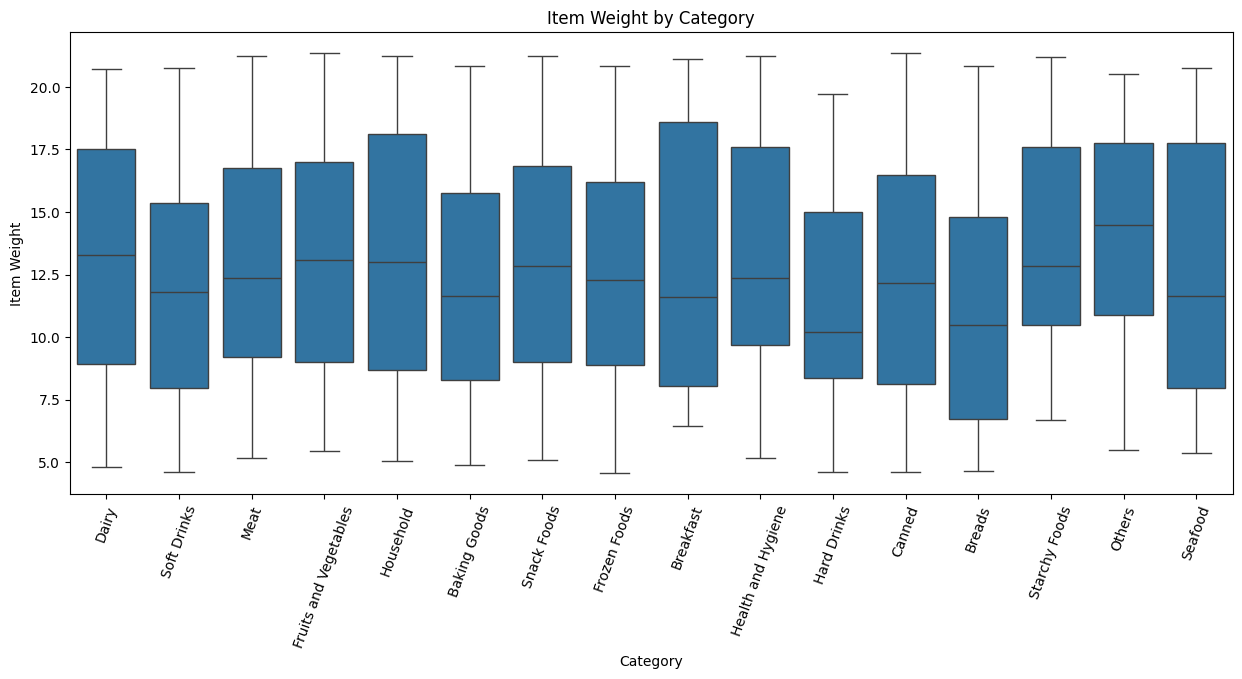

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Item_Type', y='Item_Weight', data=df,)
plt.title('Item Weight by Category')
plt.xlabel('Category')
plt.ylabel('Item Weight')
plt.xticks(rotation = 70)
plt.show()


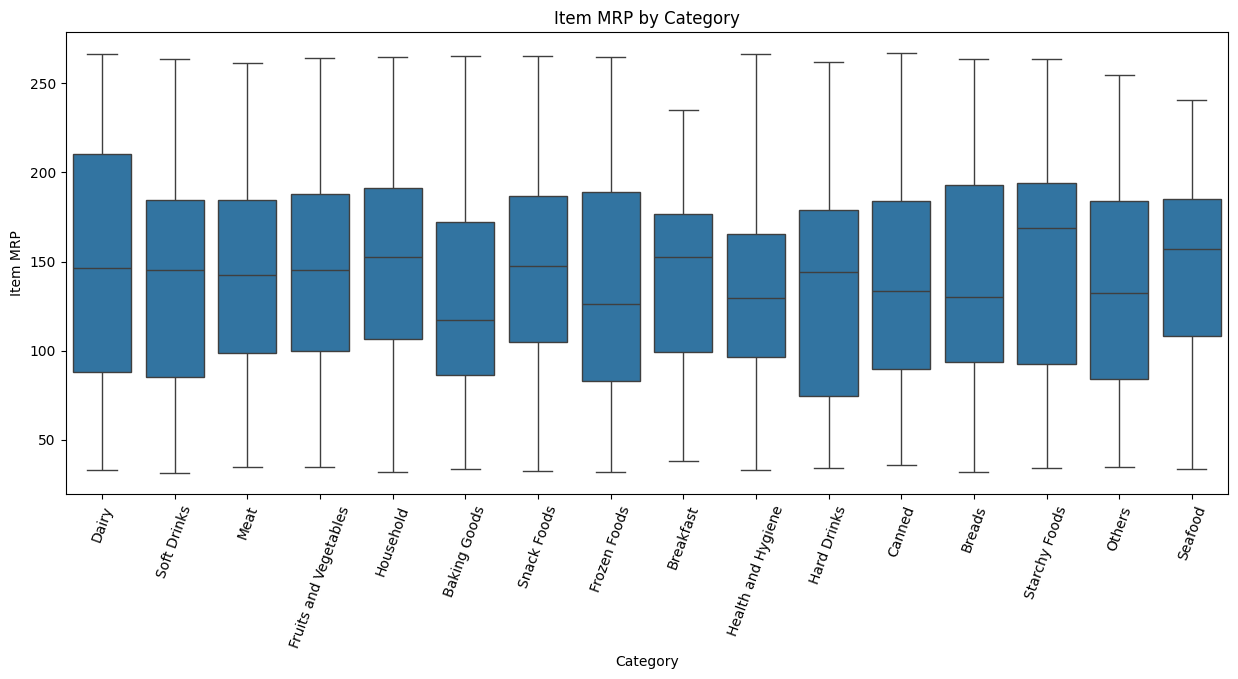

In [53]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Item_Type', y='Item_MRP', data=df,)
plt.title('Item MRP by Category')
plt.xlabel('Category')
plt.ylabel('Item MRP')
plt.xticks(rotation = 70)
plt.show()


#### Cat vs Cat

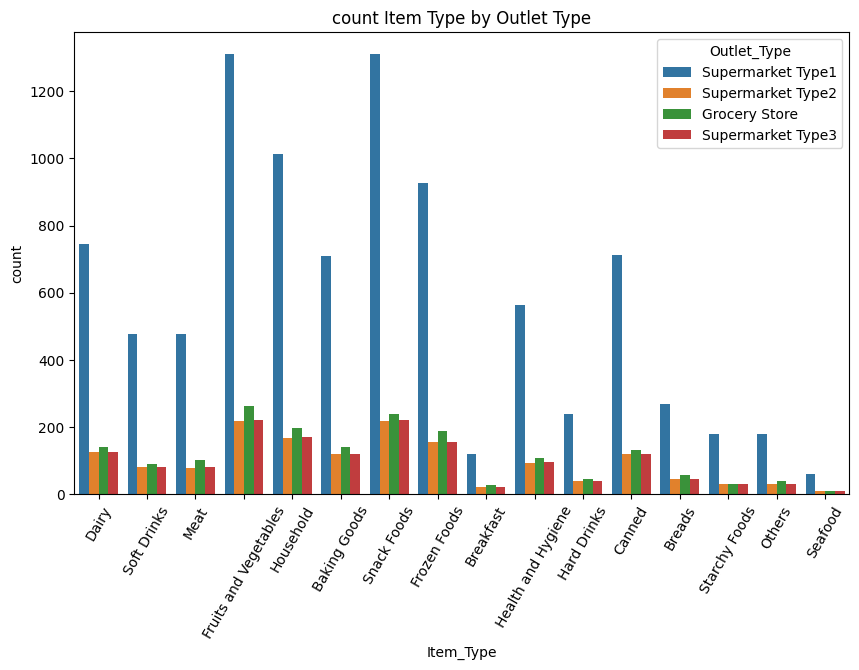

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Item_Type"],hue="Outlet_Type",data=df)
plt.title('count Item Type by Outlet Type')
plt.xticks(rotation=60)
plt.show()


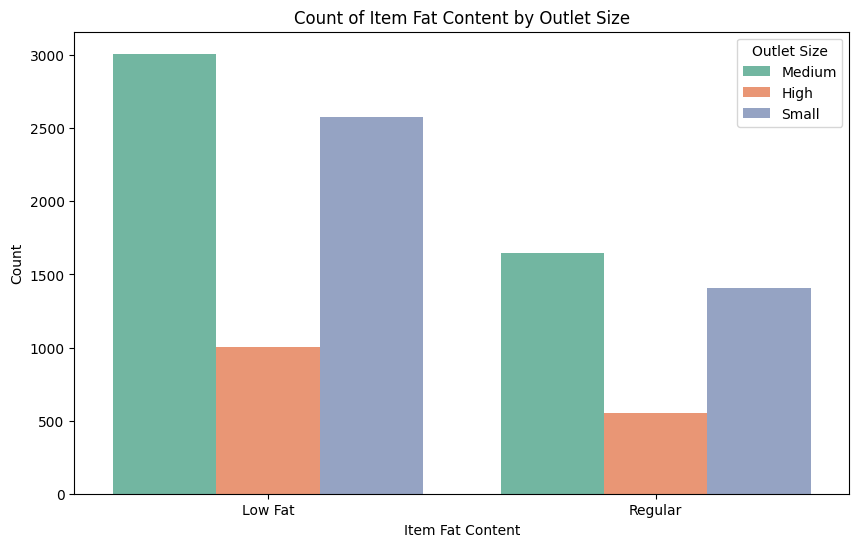

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Fat_Content', data=df, hue='Outlet_Size', palette='Set2')
plt.title('Count of Item Fat Content by Outlet Size')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.legend(title='Outlet Size')
plt.show()


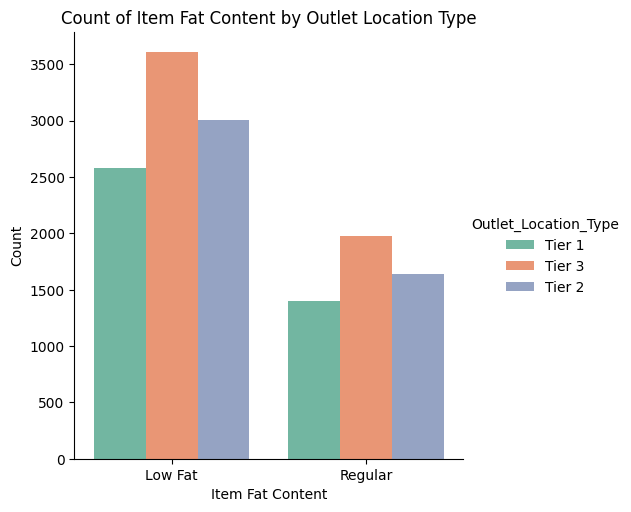

In [56]:
sns.catplot(x='Item_Fat_Content', hue='Outlet_Location_Type', data=df, kind='count', palette='Set2')
plt.title('Count of Item Fat Content by Outlet Location Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()


## Multivariate analysis

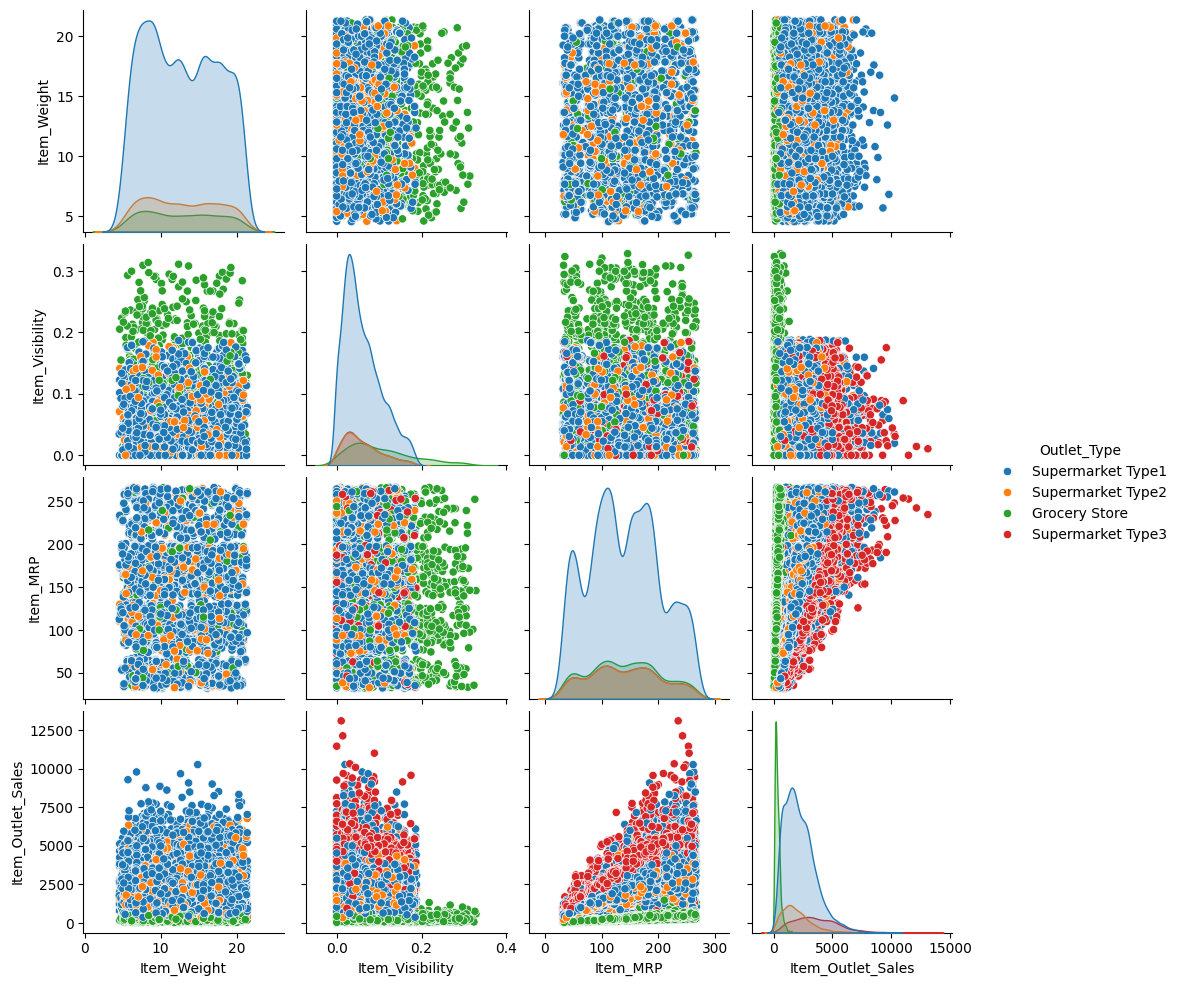

In [57]:
sns.pairplot(df, hue="Outlet_Type", 
             vars=['Item_Weight','Item_Visibility',
                   'Item_MRP','Item_Outlet_Sales'])
plt.show()

### Questions

### 1. What are the top 5 selling items?

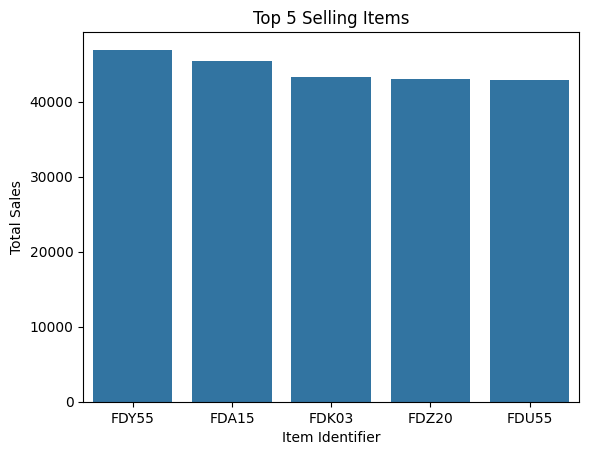

In [58]:
top_selling_items = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5)
top_selling_items
sns.barplot(x=top_selling_items.index, y=top_selling_items.values)
plt.title('Top 5 Selling Items')
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.show()

### 2. How do sales vary across different outlet types?

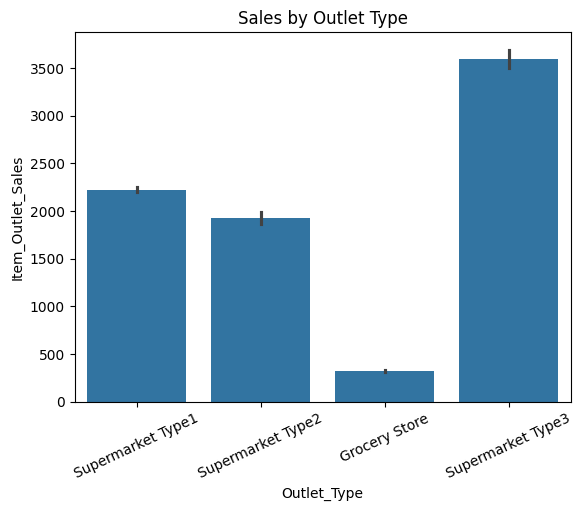

In [59]:
sns.barplot(df,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Type')
plt.xticks(rotation=25)
plt.show()

### 3. What is the average weight of items in each item category?

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64


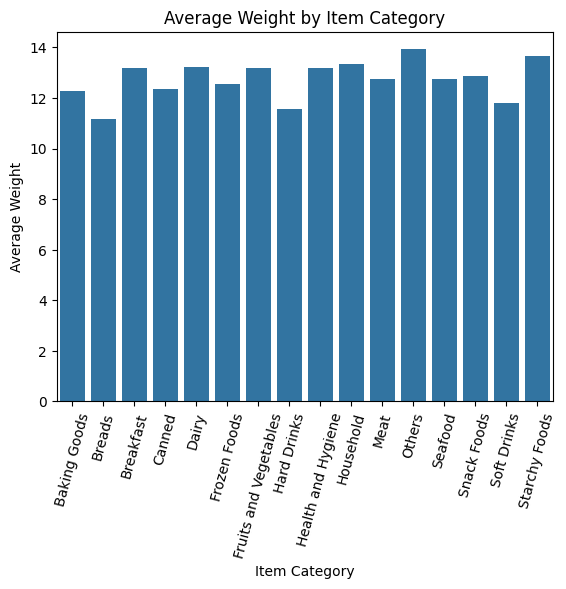

In [60]:
avg_weight_by_category = df.groupby('Item_Type')['Item_Weight'].mean()
print(avg_weight_by_category)
sns.barplot(x=avg_weight_by_category.index, y=avg_weight_by_category.values)
plt.title('Average Weight by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Average Weight')
plt.xticks(rotation=75)
plt.show()

### 4. How do sales correlate with item visibility?

Correlation between Item Visibility and Sales: -0.13411767791201623


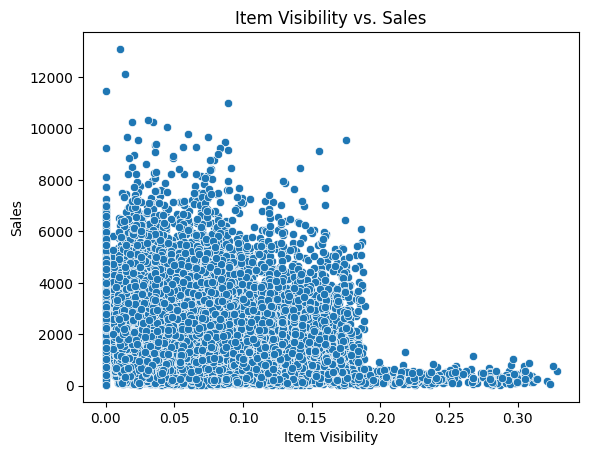

In [61]:
correlation = df['Item_Visibility'].corr(df['Item_Outlet_Sales'])
print(f'Correlation between Item Visibility and Sales: {correlation}')
sns.scatterplot(df,x='Item_Visibility', y='Item_Outlet_Sales',)
plt.title('Item Visibility vs. Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

### 5. Which outlet size has the highest average sales?

Outlet_Size
High      2201.291586
Medium    2595.137534
Small     1824.461411
Name: Item_Outlet_Sales, dtype: float64


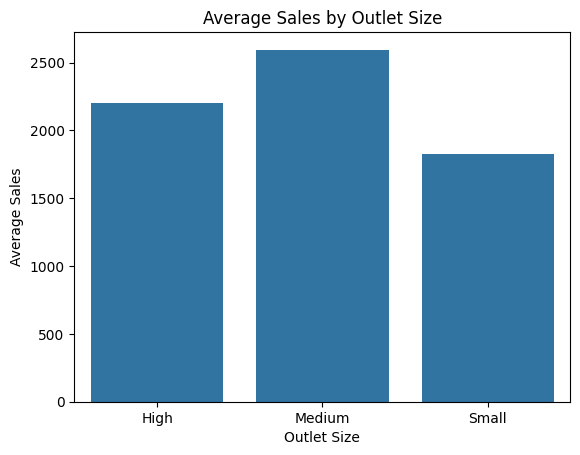

In [62]:
avg_sales_by_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
print(avg_sales_by_size)
sns.barplot(x=avg_sales_by_size.index, y=avg_sales_by_size.values)
plt.title('Average Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.show()

### 6. How do sales vary across different outlet locations?

Outlet_Location_Type
Tier 1    7.149740e+06
Tier 2    1.036683e+07
Tier 3    1.230237e+07
Name: Item_Outlet_Sales, dtype: float64


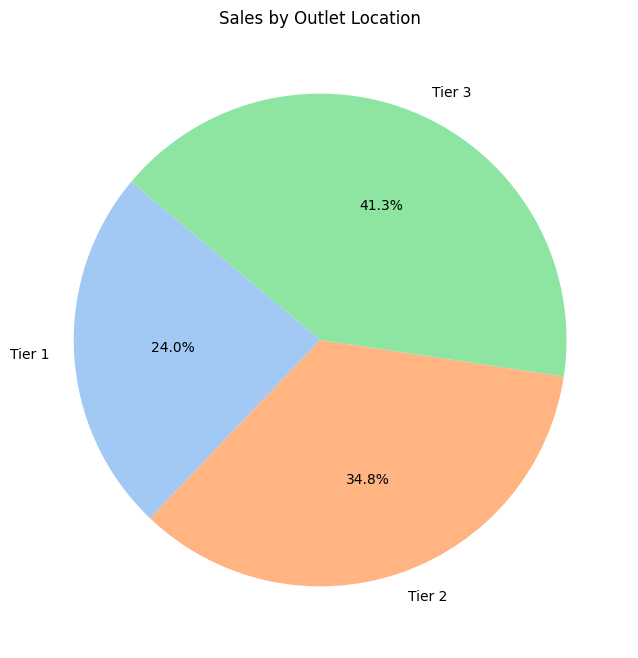

In [63]:

sales_by_location = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
print(sales_by_location )
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel', len(sales_by_location))
plt.pie(sales_by_location, labels=sales_by_location.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sales by Outlet Location')
plt.show()

### 7. Which item categories have the highest average sales?

Item_Type
Seafood                  2348.508294
Starchy Foods            2276.626228
Snack Foods              2186.947995
Household                2180.806457
Fruits and Vegetables    2180.256313
Dairy                    2146.448459
Breads                   2119.605794
Canned                   2115.507452
Meat                     2108.724404
Breakfast                2031.602837
Hard Drinks              2006.791595
Soft Drinks              2002.402817
Frozen Foods             2001.205685
Health and Hygiene       1985.192022
Others                   1937.793122
Baking Goods             1896.767842
Name: Item_Outlet_Sales, dtype: float64


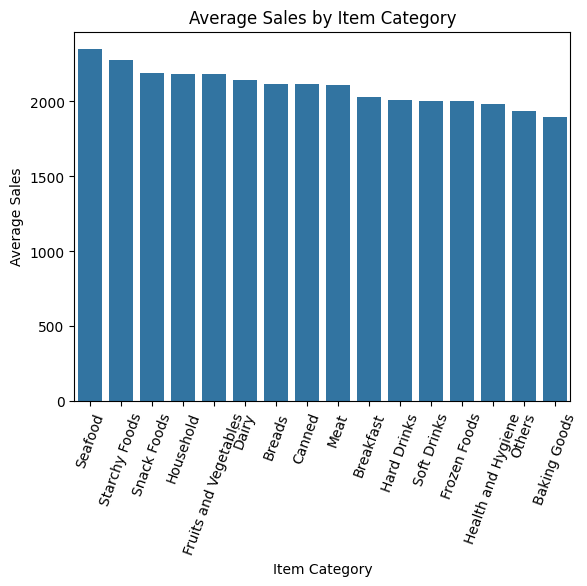

In [64]:
avg_sales_by_category = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print(avg_sales_by_category)
sns.barplot(x=avg_sales_by_category.index, y=avg_sales_by_category.values)
plt.title('Average Sales by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=70)
plt.show()

### 8. Are there any relationships between item weight and sales?

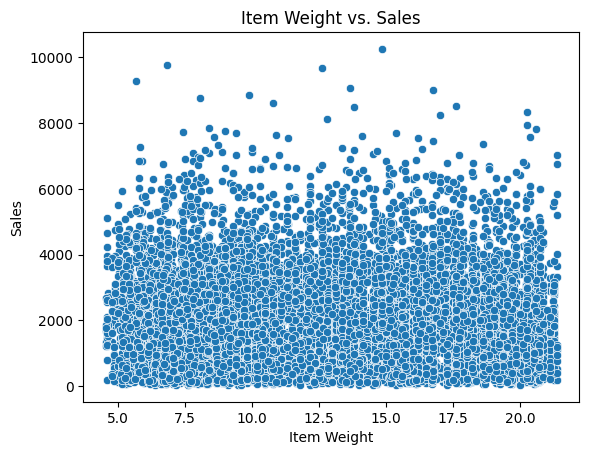

In [65]:
sns.scatterplot(df,x='Item_Weight', y='Item_Outlet_Sales')
plt.title('Item Weight vs. Sales')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

### 9. How do sales vary across different fat content levels?

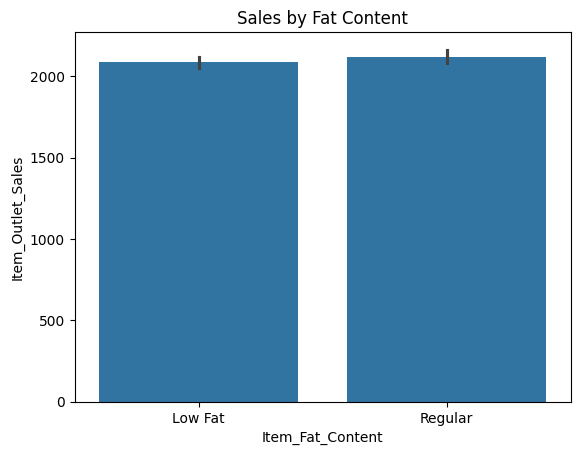

In [66]:
sns.barplot(df,x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Sales by Fat Content')
plt.show()

### 10. Which outlet has the highest total sales?

Outlet_Identifier
OUT010    2.990239e+05
OUT013    3.418606e+06
OUT017    3.517541e+06
OUT018    2.979587e+06
OUT019    2.833027e+05
OUT027    5.605150e+06
OUT035    3.607245e+06
OUT045    3.242041e+06
OUT046    3.370809e+06
OUT049    3.495628e+06
Name: Item_Outlet_Sales, dtype: float64


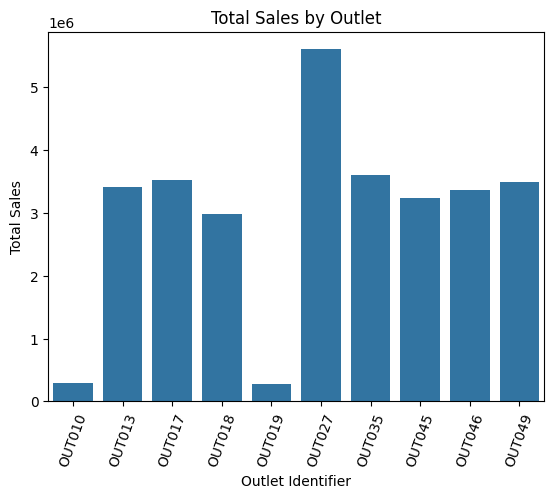

In [67]:
total_sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
print(total_sales_by_outlet)
sns.barplot(x=total_sales_by_outlet.index, y=total_sales_by_outlet.values)
plt.title('Total Sales by Outlet')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.show()

### 11. What is the average sales for each outlet establishment year?

Outlet_Establishment_Year
1985    2414.289720
1987    2201.291586
1997    2174.715504
1998     323.269115
1999    2255.243825
2002    2094.341504
2004    2327.254638
2007    2279.676866
2009    1927.288071
Name: Item_Outlet_Sales, dtype: float64


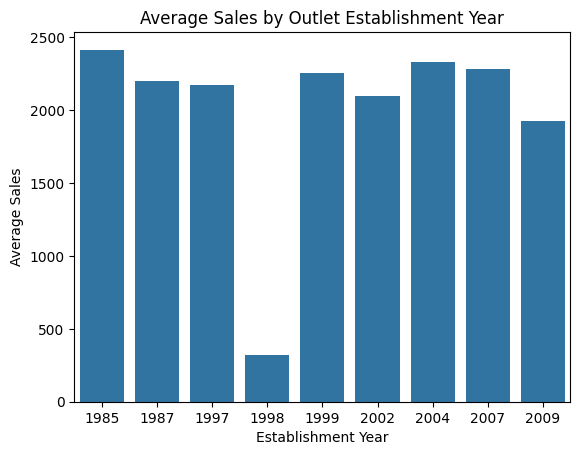

In [68]:
avg_sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
print(avg_sales_by_year)
sns.barplot(x=avg_sales_by_year.index, y=avg_sales_by_year.values)
plt.title('Average Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Average Sales')
plt.show()

### 12. Are there any relationships between item MRP and sales?

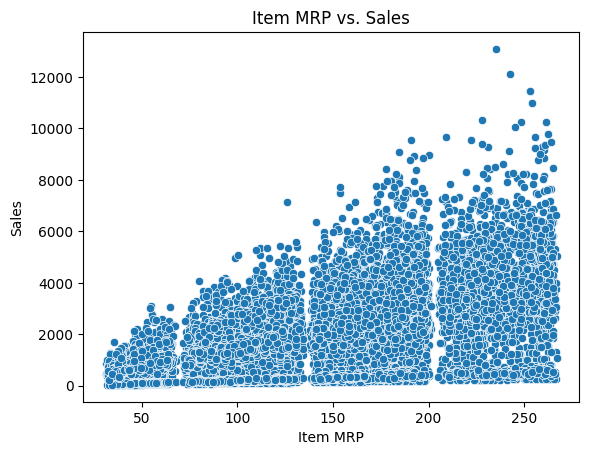

In [69]:
sns.scatterplot(df,x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item MRP vs. Sales')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()

## Pre-Processing 

###  Detect & Handle Duplicates

In [70]:
df.duplicated().sum()

0

### Train-test-split

In [71]:
X = df.drop(["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
11133       15.850          Regular         0.007187            Snack Foods   
3804         8.975          Regular         0.009057                 Canned   
9532        17.750          Low Fat         0.098264     Health and Hygiene   
318         13.350          Low Fat         0.139735           Frozen Foods   
3611         8.510          Low Fat         0.052240              Household   
...            ...              ...              ...                    ...   
5191        15.600          Low Fat         0.117575           Frozen Foods   
13418        9.800          Low Fat         0.106717  Fruits and Vegetables   
5390        17.600          Low Fat         0.018944     Health and Hygiene   
860         20.350          Low Fat         0.054363            Snack Foods   
7270        16.350          Low Fat         0.016993              Household   

       Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
11133   41.1480                       2007         NaN               Tier 2   
3804   104.0990                       2004       Small               Tier 2   
9532   241.8196                       2007         NaN               Tier 2   
318    147.5392                       2002         NaN               Tier 2   
3611   141.9470                       2007         NaN               Tier 2   
...         ...                        ...         ...                  ...   
5191    75.6670                       2007         NaN               Tier 2   
13418  178.3370                       1997       Small               Tier 1   
5390   237.3590                       2002         NaN               Tier 2   
860    117.9466                       2007         NaN               Tier 2   
7270    95.7410                       1997       Small               Tier 1   

             Outlet_Type  
11133  Supermarket Type1  
3804   Supermarket Type1  
9532   Supermarket Type1  
318    Supermarket Type1  
3611   Supermarket Type1  
...                  ...  
5191   Supermarket Type1  
13418  Supermarket Type1  
5390   Supermarket Type1  
860    Supermarket Type1  
7270   Supermarket Type1  

[11363 rows x 9 columns]

### Detect & Handle NaNs

In [72]:
X_train.isna().sum()

Item_Weight                  1968
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  3202
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [73]:
knn_imputer = KNNImputer(n_neighbors=3)
X_train['Item_Weight'] = knn_imputer.fit_transform(X_train[['Item_Weight']])
X_test['Item_Weight'] = knn_imputer.transform(X_test[['Item_Weight']])


In [74]:
X_train.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  3202
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [75]:
X_test.isna().sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                  814
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [76]:
simple_imputer = SimpleImputer(strategy="most_frequent")
X_train[["Outlet_Size"]] = simple_imputer.fit_transform(X_train[["Outlet_Size"]])
X_test[["Outlet_Size"]] = simple_imputer.fit_transform(X_test[["Outlet_Size"]])


In [77]:
X_test.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Detect & handle Outliers

<Axes: xlabel='Item_Visibility'>

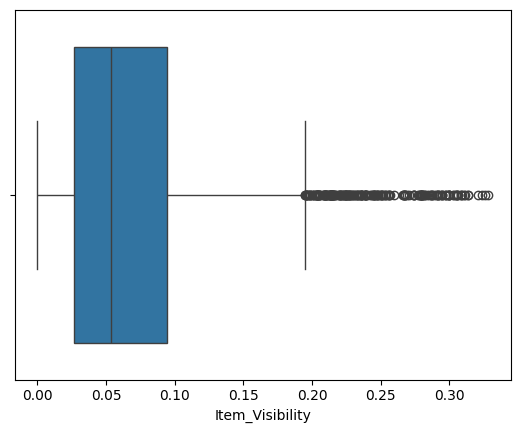

In [78]:
sns.boxplot(x=X_train['Item_Visibility'])

In [79]:
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub] = ub
    data[data < lb] = lb    
    return data


X_train["Item_Visibility"] = handle_outliers(X_train["Item_Visibility"])
X_test["Item_Visibility"] = handle_outliers(X_test["Item_Visibility"])

/var/folders/5c/1yvn74ns7yq9hl5048h7kgzc0000gn/T/ipykernel_8864/3283005582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] = ub
/var/folders/5c/1yvn74ns7yq9hl5048h7kgzc0000gn/T/ipykernel_8864/3283005582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lb] = lb
/var/folders/5c/1yvn74ns7yq9hl5048h7kgzc0000gn/T/ipykernel_8864/3283005582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] 

<Axes: ylabel='Item_Visibility'>

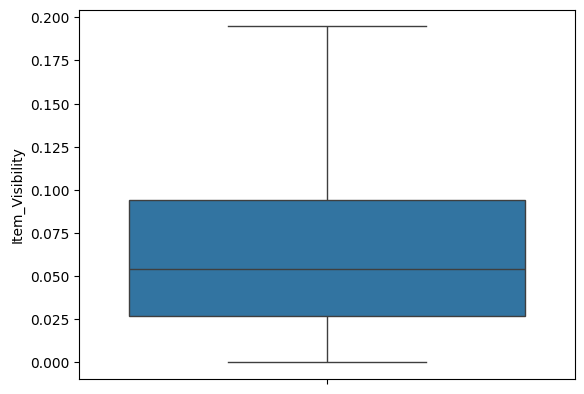

In [80]:
sns.boxplot(y=X_train['Item_Visibility'])

In [81]:
X_train = X_train.reset_index(drop=True)
X_train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           15.850          Regular         0.007187            Snack Foods   
1            8.975          Regular         0.009057                 Canned   
2           17.750          Low Fat         0.098264     Health and Hygiene   
3           13.350          Low Fat         0.139735           Frozen Foods   
4            8.510          Low Fat         0.052240              Household   
...            ...              ...              ...                    ...   
11358       15.600          Low Fat         0.117575           Frozen Foods   
11359        9.800          Low Fat         0.106717  Fruits and Vegetables   
11360       17.600          Low Fat         0.018944     Health and Hygiene   
11361       20.350          Low Fat         0.054363            Snack Foods   
11362       16.350          Low Fat         0.016993              Household   

       Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0       41.1480                       2007      Medium               Tier 2   
1      104.0990                       2004       Small               Tier 2   
2      241.8196                       2007      Medium               Tier 2   
3      147.5392                       2002      Medium               Tier 2   
4      141.9470                       2007      Medium               Tier 2   
...         ...                        ...         ...                  ...   
11358   75.6670                       2007      Medium               Tier 2   
11359  178.3370                       1997       Small               Tier 1   
11360  237.3590                       2002      Medium               Tier 2   
11361  117.9466                       2007      Medium               Tier 2   
11362   95.7410                       1997       Small               Tier 1   

             Outlet_Type  
0      Supermarket Type1  
1      Supermarket Type1  
2      Supermarket Type1  
3      Supermarket Type1  
4      Supermarket Type1  
...                  ...  
11358  Supermarket Type1  
11359  Supermarket Type1  
11360  Supermarket Type1  
11361  Supermarket Type1  
11362  Supermarket Type1  

[11363 rows x 9 columns]

In [82]:
X_test = X_test.reset_index(drop=True)
X_test

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0       12.776971          Regular         0.010866                   Meat   
1        7.575000          Low Fat         0.055476                  Dairy   
2       19.200000          Low Fat         0.077493              Household   
3       12.776971          Regular         0.000000                   Meat   
4        8.270000          Regular         0.128187            Soft Drinks   
...           ...              ...              ...                    ...   
2836    20.500000          Low Fat         0.020637  Fruits and Vegetables   
2837    11.800000          Regular         0.057746                   Meat   
2838    13.000000          Low Fat         0.138660              Household   
2839    18.850000          Low Fat         0.016105     Health and Hygiene   
2840    16.200000          Regular         0.016721           Frozen Foods   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     111.4544                       1985      Medium               Tier 3   
1     196.8768                       1999      Medium               Tier 1   
2     197.0110                       2004       Small               Tier 2   
3     182.0608                       1985      Medium               Tier 3   
4     184.3924                       2002      Medium               Tier 2   
...        ...                        ...         ...                  ...   
2836   87.8830                       1999      Medium               Tier 1   
2837  152.4366                       2007      Medium               Tier 2   
2838   62.9194                       1998      Medium               Tier 3   
2839  130.2626                       2004       Small               Tier 2   
2840   96.1726                       2009      Medium               Tier 3   

            Outlet_Type  
0     Supermarket Type3  
1     Supermarket Type1  
2     Supermarket Type1  
3     Supermarket Type3  
4     Supermarket Type1  
...                 ...  
2836  Supermarket Type1  
2837  Supermarket Type1  
2838      Grocery Store  
2839  Supermarket Type1  
2840  Supermarket Type2  

[2841 rows x 9 columns]

### Encoding 

In [83]:
ohe_encoder = OneHotEncoder()
result = ohe_encoder.fit_transform(X_train[["Item_Fat_Content","Outlet_Location_Type","Outlet_Type"]]).toarray()
result

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [84]:
nominal_encoded_train = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())
nominal_encoded_train

Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                           0.0                       1.0   
1                           0.0                       1.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   
...                         ...                       ...   
11358                       1.0                       0.0   
11359                       1.0                       0.0   
11360                       1.0                       0.0   
11361                       1.0                       0.0   
11362                       1.0                       0.0   

       Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          1.0   
3                              0.0                          1.0   
4                              0.0                          1.0   
...                            ...                          ...   
11358                          0.0                          1.0   
11359                          1.0                          0.0   
11360                          0.0                          1.0   
11361                          0.0                          1.0   
11362                          1.0                          0.0   

       Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   
...                            ...                        ...   
11358                          0.0                        0.0   
11359                          0.0                        0.0   
11360                          0.0                        0.0   
11361                          0.0                        0.0   
11362                          0.0                        0.0   

       Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                                1.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
11358                            1.0                            0.0   
11359                            1.0                            0.0   
11360                            1.0                            0.0   
11361                            1.0                            0.0   
11362                            1.0                            0.0   

       Outlet_Type_Supermarket Type3  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
...                              ...  
11358                            0.0  
11359                            0.0  
11360                            0.0  
11361                            0.0  
11362                            0.0  

[11363 rows x 9 columns]

In [85]:
result = ohe_encoder.transform(X_test[["Item_Fat_Content","Outlet_Location_Type","Outlet_Type"]]).toarray()
nominal_encoded_test = pd.DataFrame(result, columns=ohe_encoder.get_feature_names_out())
nominal_encoded_test

Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          0.0                       1.0   
1                          1.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       1.0   
4                          0.0                       1.0   
...                        ...                       ...   
2836                       1.0                       0.0   
2837                       0.0                       1.0   
2838                       1.0                       0.0   
2839                       1.0                       0.0   
2840                       0.0                       1.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                             0.0                          0.0   
1                             1.0                          0.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          1.0   
...                           ...                          ...   
2836                          1.0                          0.0   
2837                          0.0                          1.0   
2838                          0.0                          0.0   
2839                          0.0                          1.0   
2840                          0.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                             1.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             1.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
2836                          0.0                        0.0   
2837                          0.0                        0.0   
2838                          1.0                        1.0   
2839                          0.0                        0.0   
2840                          1.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                               0.0                            0.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               0.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
2836                            1.0                            0.0   
2837                            1.0                            0.0   
2838                            0.0                            0.0   
2839                            1.0                            0.0   
2840                            0.0                            1.0   

      Outlet_Type_Supermarket Type3  
0                               1.0  
1                               0.0  
2                               0.0  
3                               1.0  
4                               0.0  
...                             ...  
2836                            0.0  
2837                            0.0  
2838                            0.0  
2839                            0.0  
2840                            0.0  

[2841 rows x 9 columns]

In [86]:
binary_encoder = BinaryEncoder()
nominal_encoded_train_2 = binary_encoder.fit_transform(X_train["Item_Type"])
nominal_encoded_train_2

Item_Type_0  Item_Type_1  Item_Type_2  Item_Type_3  Item_Type_4
0                0            0            0            0            1
1                0            0            0            1            0
2                0            0            0            1            1
3                0            0            1            0            0
4                0            0            1            0            1
...            ...          ...          ...          ...          ...
11358            0            0            1            0            0
11359            0            1            0            0            1
11360            0            0            0            1            1
11361            0            0            0            0            1
11362            0            0            1            0            1

[11363 rows x 5 columns]

In [87]:
nominal_encoded_test_2 = binary_encoder.transform(X_test["Item_Type"])
nominal_encoded_test_2

Item_Type_0  Item_Type_1  Item_Type_2  Item_Type_3  Item_Type_4
0               0            1            1            0            1
1               0            1            0            1            0
2               0            0            1            0            1
3               0            1            1            0            1
4               0            1            0            0            0
...           ...          ...          ...          ...          ...
2836            0            1            0            0            1
2837            0            1            1            0            1
2838            0            0            1            0            1
2839            0            0            0            1            1
2840            0            0            1            0            0

[2841 rows x 5 columns]

In [88]:
ordinal_encoder  = OrdinalEncoder()
result = ordinal_encoder.fit_transform(X_train[["Outlet_Size"]])
ordinal_encoded_train = pd.DataFrame(result, columns=ordinal_encoder.get_feature_names_out())
ordinal_encoded_train

Outlet_Size
0              1.0
1              2.0
2              1.0
3              1.0
4              1.0
...            ...
11358          1.0
11359          2.0
11360          1.0
11361          1.0
11362          2.0

[11363 rows x 1 columns]

In [89]:
result = ordinal_encoder.transform(X_test[["Outlet_Size"]])
ordinal_encoded_test = pd.DataFrame(result, columns=ordinal_encoder.get_feature_names_out())
ordinal_encoded_test

Outlet_Size
0             1.0
1             1.0
2             2.0
3             1.0
4             1.0
...           ...
2836          1.0
2837          1.0
2838          1.0
2839          2.0
2840          1.0

[2841 rows x 1 columns]

In [90]:
X_train_encoded = pd.concat([
    X_train.drop(columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type", "Item_Type", "Outlet_Size"]),
    nominal_encoded_train,
    nominal_encoded_train_2,
    ordinal_encoded_train
], axis=1)

X_test_encoded = pd.concat([
    X_test.drop(columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type", "Item_Type", "Outlet_Size"]),
    nominal_encoded_test,
    nominal_encoded_test_2,
    ordinal_encoded_test
], axis=1)

In [91]:
X_train_encoded 


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           15.850         0.007187   41.1480                       2007   
1            8.975         0.009057  104.0990                       2004   
2           17.750         0.098264  241.8196                       2007   
3           13.350         0.139735  147.5392                       2002   
4            8.510         0.052240  141.9470                       2007   
...            ...              ...       ...                        ...   
11358       15.600         0.117575   75.6670                       2007   
11359        9.800         0.106717  178.3370                       1997   
11360       17.600         0.018944  237.3590                       2002   
11361       20.350         0.054363  117.9466                       2007   
11362       16.350         0.016993   95.7410                       1997   

       Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                           0.0                       1.0   
1                           0.0                       1.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   
...                         ...                       ...   
11358                       1.0                       0.0   
11359                       1.0                       0.0   
11360                       1.0                       0.0   
11361                       1.0                       0.0   
11362                       1.0                       0.0   

       Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          1.0   
3                              0.0                          1.0   
4                              0.0                          1.0   
...                            ...                          ...   
11358                          0.0                          1.0   
11359                          1.0                          0.0   
11360                          0.0                          1.0   
11361                          0.0                          1.0   
11362                          1.0                          0.0   

       Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   
...                            ...                        ...   
11358                          0.0                        0.0   
11359                          0.0                        0.0   
11360                          0.0                        0.0   
11361                          0.0                        0.0   
11362                          0.0                        0.0   

       Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                                1.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                1.0                            0.0   
...                              ...                            ...   
11358                            1.0                            0.0   
11359                            1.0                            0.0   
11360                            1.0                            0.0   
11361                            1.0                            0

In [109]:
X_test_encoded

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0       12.776971         0.010866  111.4544                       1985   
1        7.575000         0.055476  196.8768                       1999   
2       19.200000         0.077493  197.0110                       2004   
3       12.776971         0.000000  182.0608                       1985   
4        8.270000         0.128187  184.3924                       2002   
...           ...              ...       ...                        ...   
2836    20.500000         0.020637   87.8830                       1999   
2837    11.800000         0.057746  152.4366                       2007   
2838    13.000000         0.138660   62.9194                       1998   
2839    18.850000         0.016105  130.2626                       2004   
2840    16.200000         0.016721   96.1726                       2009   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          0.0                       1.0   
1                          1.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       1.0   
4                          0.0                       1.0   
...                        ...                       ...   
2836                       1.0                       0.0   
2837                       0.0                       1.0   
2838                       1.0                       0.0   
2839                       1.0                       0.0   
2840                       0.0                       1.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                             0.0                          0.0   
1                             1.0                          0.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          1.0   
...                           ...                          ...   
2836                          1.0                          0.0   
2837                          0.0                          1.0   
2838                          0.0                          0.0   
2839                          0.0                          1.0   
2840                          0.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                             1.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             1.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
2836                          0.0                        0.0   
2837                          0.0                        0.0   
2838                          1.0                        1.0   
2839                          0.0                        0.0   
2840                          1.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                               0.0                            0.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               0.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
2836                            1.0                            0.0   
2837                            1.0                            0.0   
2838                            0.0                            0.0   
2839                            1.0                            0.0   
2840                            0.0                 

### Save Data

In [92]:
X_train_encoded.to_csv("project_cleaned_data/X_train_encoded.csv")
X_test_encoded.to_csv("project_cleaned_data/X_test_encoded.csv")
y_train.to_csv("project_cleaned_data/y_train.csv")
y_test.to_csv("project_cleaned_data/y_test.csv")